# Adhar Data Analytics

## Dataset1 - Adhar Enrolment (New Adhar)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. Import dataset

## Combine multiple Aadhaar enrolment CSV files with identical structure by stacking rows

In [2]:
# Combine multiple Aadhaar enrolment CSV files with identical structure by stacking rows by stacking rows
import pandas as pd

df1 = pd.read_csv(r"..\aadhar_enrolment\Enrolment_1.csv")
df2 = pd.read_csv(r"..\aadhar_enrolment\Enrolment_2.csv")
df3 = pd.read_csv(r"..\aadhar_enrolment\Enrolment_3.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.shape)


(1006029, 7)


In [3]:
df['date'].agg(['min', 'max'])

min    01-04-2025
max    31-12-2025
Name: date, dtype: object

# Basic Analysis (Note: Must perform 12 steps for every dataset)

## 2. Finding Head

In [4]:
df.head(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


## 3. Finding Tail

In [5]:
df.tail(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


## 4. Finding Type

In [6]:
f'Data Type is : {type(df)}' #is used to check what kind of Python object df is.

"Data Type is : <class 'pandas.core.frame.DataFrame'>"

## 5. Finding Data Type For each Column

In [7]:
df.dtypes # column-wise data types

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

## 6. Finding Random Sample From Dataset

In [8]:
df.sample(3)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
445684,19-10-2025,Jammu and Kashmir,Kathua,184101,1,1,0
967374,28-12-2025,Karnataka,Shimoga,577433,2,0,0
60617,04-09-2025,Uttar Pradesh,Ghazipur,233226,2,7,0


## 7. Finding Summary of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


## 8. Finding All Columns Names

In [10]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

## 9. Finding All data/List out/Display all records/entire dataset

In [11]:
pd.set_option('display.max_rows',None)

## 10. Finding Out the Shape of Dataset

In [12]:
df.shape

(1006029, 7)

## 11. Finding Out Description Of Dataset

In [13]:
df.describe() # → Shows statistical summary of numerical columns (count, mean, std, min, quartiles, max).

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


In [14]:
df.describe(include = 'object') #→ Shows summary of categorical/text columns (count, unique values, top value, frequency).

,date,state,district
count,1006029,1006029,1006029
unique,92,55,985
top,15-12-2025,Uttar Pradesh,Pune
freq,19426,110369,6663


## 12. Finding Null Values

In [15]:
df.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

# Data Analysis

## Data Quality Check (Note: used to chech for every dataset)

## Finding/Checking Null Values

In [16]:
print("=== DATA QUALITY ASSESSMENT ===")

# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data>0])

# Check for duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

## Find negative values in all numeric columns of the dataset
negatives = df[df.select_dtypes(include=[np.number]) < 0].stack()
print(negatives)

=== DATA QUALITY ASSESSMENT ===
Missing Values:
Series([], dtype: int64)
Duplicate Rows: 22957
Series([], dtype: object)


# Data Cleaning and outlier detection

In [17]:
# Remove exact duplicate rows caused by overlapping Aadhaar data files to prevent double-counting
df = df.drop_duplicates()
df.shape

(983072, 7)

In [18]:
import numpy as np

# Detect outliers using IQR method for all numeric columns
outliers_iqr = {}

for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_iqr[col] = len(outliers)

print("IQR Outlier Count per Column:")
print(outliers_iqr)


IQR Outlier Count per Column:
{'age_0_5': 99397, 'age_5_17': 132460, 'age_18_greater': 39254}


In [19]:
# Flag IQR-based outliers for review instead of removing valid population-driven extremes
df['iqr_outlier_flag'] = False

for col in ['age_0_5', 'age_5_17', 'age_18_greater']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df.loc[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR), 'iqr_outlier_flag'] = True


In [20]:
print(df.columns)

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'iqr_outlier_flag'],
      dtype='object')


In [21]:
# View all unique state names
states = df['state'].unique()

print(f"Total unique states: {len(states)}")
print(states)

Total unique states: 55
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Jammu And Kashmir'
 'Dadra and Nagar Haveli and Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Orissa' 'Pondicherry' 'Puducherry'
 'Lakshadweep' 'Andaman & Nicobar Islands' 'Dadra & Nagar Haveli'
 'Dadra and Nagar Haveli' 'Daman and Diu' 'WEST BENGAL' 'Jammu & Kashmir'
 'West  Bengal' '100000' 'Daman & Diu' 'West Bangal' 'Westbengal'
 'West bengal' 'andhra pradesh' 'ODISHA' 'WESTBENGAL']


In [22]:
# Mapping of inconsistent/variant state names to official state/UT names
state_mapping = {

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Arunachal Pradesh
    'arunachal pradesh': 'Arunachal Pradesh',

    # Assam
    'assam': 'Assam',

    # Bihar
    'bihar': 'Bihar',

    # Chhattisgarh
    'chhattisgarh': 'Chhattisgarh',

    # Goa
    'goa': 'Goa',

    # Gujarat
    'gujarat': 'Gujarat',

    # Haryana
    'haryana': 'Haryana',

    # Himachal Pradesh
    'himachal pradesh': 'Himachal Pradesh',

    # Jammu & Kashmir
    'jammu & kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',

    # Jharkhand
    'jharkhand': 'Jharkhand',

    # Karnataka
    'karnataka': 'Karnataka',

    # Kerala
    'kerala': 'Kerala',

    # Ladakh
    'ladakh': 'Ladakh',

    # Lakshadweep
    'lakshadweep': 'Lakshadweep',

    # Madhya Pradesh
    'madhya pradesh': 'Madhya Pradesh',

    # Maharashtra
    'maharashtra': 'Maharashtra',

    # Manipur
    'manipur': 'Manipur',

    # Meghalaya
    'meghalaya': 'Meghalaya',

    # Mizoram
    'mizoram': 'Mizoram',

    # Nagaland
    'nagaland': 'Nagaland',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',
    'ODISHA': 'Odisha',

    # Puducherry
    'pondicherry': 'Puducherry',
    'puducherry': 'Puducherry',

    # Punjab
    'punjab': 'Punjab',

    # Rajasthan
    'rajasthan': 'Rajasthan',

    # Sikkim
    'sikkim': 'Sikkim',

    # Tamil Nadu
    'tamil nadu': 'Tamil Nadu',

    # Telangana
    'telangana': 'Telangana',

    # Tripura
    'tripura': 'Tripura',

    # Uttar Pradesh
    'uttar pradesh': 'Uttar Pradesh',

    # Uttarakhand
    'uttarakhand': 'Uttarakhand',

    # West Bengal
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'WEST BENGAL': 'West Bengal',

    # Andaman & Nicobar Islands
    'andaman & nicobar islands': 'Andaman and Nicobar Islands',
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',

    # Dadra & Nagar Haveli and Daman & Diu
    'dadra & nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman & diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu'
}

# Step 1: Remove invalid rows where state is missing or invalid
df = df[~df['state'].isna()]
df = df[df['state'] != '100000']

# Step 2: Create a normalized state column
df['state_clean'] = (
    df['state']
    .str.strip()
    .str.lower()
    .map(state_mapping)
    .fillna(df['state'])
)

# Step 3: Count unique states/UTs after cleaning
total_states_ut = df['state_clean'].nunique()
print(f"Total unique states and UTs: {total_states_ut}")

# Step 4: Check unique states after cleaning
print(df['state_clean'].sort_values().unique())


Total unique states and UTs: 36
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [23]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'iqr_outlier_flag', 'state_clean'],
      dtype='object')

In [24]:
# ==========================
# TOTAL + STATEWISE DISTRICT SUMMARY (RAW DATA)
# ==========================

# Keep only required columns and remove duplicate state–district pairs
state_district_df = df[['state', 'district']].drop_duplicates()

# 1️⃣ Total unique districts (overall)
total_unique_districts = state_district_df['district'].nunique()

# 2️⃣ State-wise district count
statewise_district_count = (
    state_district_df
    .groupby('state')
    .size()
    .sort_values(ascending=False)
)

# 3️⃣ State-wise district names
statewise_district_names = (
    state_district_df
    .groupby('state')['district']
    .apply(list)
)

# ==========================
# OUTPUT
# ==========================

print(f"\nTotal unique districts (overall): {total_unique_districts}\n")

print("State-wise district count and district names:\n")

for state in statewise_district_count.index:
    districts = statewise_district_names[state]
    
    # single-quote + comma-separated format
    district_str = ", ".join(f"'{d}'" for d in districts)
    
    print(f"{state} — {len(districts)} districts")
    print(district_str)
    print()


Total unique districts (overall): 984

State-wise district count and district names:

Uttar Pradesh — 89 districts
'Kanpur Nagar', 'Aligarh', 'Bahraich', 'Firozabad', 'Maharajganj', 'Ghaziabad', 'Gautam Buddha Nagar', 'Lucknow', 'Agra', 'Unnao', 'Saharanpur', 'Jaunpur', 'Gorakhpur', 'Bulandshahr', 'Mathura', 'Banda', 'Kheri', 'Budaun', 'Kanpur Dehat', 'Varanasi', 'Baghpat', 'Fatehpur', 'Etawah', 'Shamli', 'Balrampur', 'Bara Banki', 'Shahjahanpur', 'Gonda', 'Bareilly', 'Sitapur', 'Sultanpur', 'Shrawasti', 'Chandauli', 'Mainpuri', 'Muzaffarnagar', 'Siddharthnagar', 'Ambedkar Nagar', 'Pilibhit', 'Kaushambi', 'Jalaun', 'Etah', 'Meerut', 'Basti', 'Azamgarh', 'Rampur', 'Moradabad', 'Amroha', 'Bijnor', 'Deoria', 'Prayagraj', 'Lalitpur', 'Hapur', 'Hathras', 'Kushinagar', 'Shravasti', 'Farrukhabad', 'Hardoi', 'Ayodhya', 'Siddharth Nagar', 'Barabanki', 'Sambhal', 'Jhansi', 'Kasganj', 'Kannauj', 'Kushi Nagar', 'Allahabad', 'Amethi', 'Auraiya', 'Ballia', 'Bhadohi', 'Chitrakoot', 'Faizabad', 'Ghaz

In [25]:
# Mapping of inconsistent/variant district names to official district names
district_mapping = {
    # Andaman and Nicobar Islands
    'Andamans': 'South Andaman',
    'Nicobars': 'Nicobar',

     #Ladakh
    'Leh (ladakh)': 'Leh',

    # Andhra Pradesh
    'Ananthapur': 'Anantapur',
    'Ananthapuramu': 'Anantapur',
    'Cuddapah': 'YSR Kadapa',
    'Y. S. R': 'YSR Kadapa',
     'Karim Nagar': 'Karimnagar',
    'Spsr Nellore': 'Sri Potti Sriramulu Nellore',
    'Nellore': 'Sri Potti Sriramulu Nellore',
    'Visakhapatanam': 'Visakhapatnam',
    'K.V.Rangareddy': 'Ranga Reddy',
    'K.v. Rangareddy': 'Ranga Reddy',
    'Rangareddi': 'Ranga Reddy',
    'rangareddi': 'Ranga Reddy',
    'N. T. R': 'NTR',
    'chittoor': 'Chittoor',

    # Assam
    'north cachar hills': 'Dima Hasao',
    'sibsagar': 'Sivasagar',
    'tamulpur district': 'Tamulpur',

    # Bihar
    'Bhabua': 'Kaimur',
    'Monghyr': 'Munger',
    'Samstipur': 'Samastipur',
    'Sheikpura': 'Sheikhpura',
    'Purbi Champaran': 'East Champaran',
    'Pashchim Champaran': 'West Champaran',

    # Chandigarh
    'Rupnagar': 'Chandigarh',

    #Chhattisgarh
    'Dantewada': 'Dakshin Bastar Dantewada',
    'Gaurella Pendra Marwahi': 'Gaurela-Pendra-Marwahi',
    'Janjgir - Champa': 'Janjgir-Champa',
    'Janjgir Champa': 'Janjgir-Champa',
    'Mohla-Manpur-Ambagarh Chouki': 'Mohalla-Manpur-Ambagarh-Chowki',
    'Uttar Bastar Kanker': 'Kanker',

    # Dadra & Nagar Haveli and Daman & Diu
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli',
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli',

    # Delhi
    'North East': 'North East Delhi',
    'North East   *': 'North East Delhi',

    # Goa
    'Bardez': 'North Goa',

    
    # Gujarat
    'Ahmadabad': 'Ahmedabad',
    'Banas Kantha': 'Banaskantha',
    'Panch Mahals': 'Panchmahals',
    'Sabar Kantha': 'Sabarkantha',
    'Surendra Nagar': 'Surendranagar',
    
    'Dang': 'The Dangs',
    'Dohad': 'Dahod',

    # Haryana
     'Gurgaon': 'Gurugram',
    'Yamuna Nagar': 'Yamunanagar',
    'Nuh (Formerly Mewat)': 'Nuh',
    'Gurugram *': 'Gurugram',
    'Jhajjar *': 'Jhajjar',

    #Himacha Pradesh
    'Lahul & Spiti': 'Lahaul and Spiti',
    'Lahul and Spiti': 'Lahaul and Spiti',

     # JHARKHAND - Brackets/special
    'Kaimur (Bhabua)': 'Kaimur',
    'Boaro  *': 'Bokaro',
    'Bokaro *': 'Bokaro',

    # Jammu and Kashmir
    'Badgam': 'Budgam',
    'Bandipore': 'Bandipora',
    'Baramula': 'Baramulla',
    'Punch': 'Poonch',
    'Shupiyan': 'Shopian',
    
    # Karnataka
     'Bangalore': 'Bengaluru Urban',
     'Bengaluru': 'Bengaluru Urban',
     'Bangalore Rural': 'Bengaluru Rural',
     'Bengaluru South': 'Bengaluru Urban',
    'Bellary': 'Ballari',
    'Belgaum': 'Belagavi',
    'Bijapur': 'Vijayapura',
    'Bijapur(Kar)': 'Vijayapura',
    'Chamrajanagar': 'Chamarajanagara',
    'Chikmagalur': 'Chikkamagaluru',
    'Gulbarga': 'Kalaburagi',
    'Hasan': 'Hassan',
    'Mysore': 'Mysuru',
    'Shimoga': 'Shivamogga',
    'Tumkur': 'Tumakuru',
    'Yadgir': 'Yadagiri',
    'Bijapurkar': 'Vijayapura',
    'Chamarajanagar': 'Chamarajanagara',
    'Chamrajnagar': 'Chamarajanagara',
    'Davangere': 'Davanagere',
    'Chickmagalur': 'Chikkamagaluru',
    'Ramanagar': 'Ramanagara',
    'Bagalkot *': 'Bagalkot',
     'Haveri *': 'Haveri',
     'Gadag *': 'Gadag',
     'Chamarajanagar *': 'Chamarajanagara',
    'Udupi *': 'Udupi',
    
    # Kerala
    'kasargod': 'Kasaragod',

    # Madhya Pradesh
    'Harda *': 'Harda',
    'West Nimar': 'Khandwa',
    'Narsimhapur': 'Narsinghpur',
    'Harda *': 'Harda',
    'East Nimar': 'Khandwa',
    
    # Maharashtra
    'Ahilyanagar': 'Ahmednagar',
    'Ahmadnagar': 'Ahmednagar', 
    'Ahmed Nagar': 'Ahmednagar',
    'Ahmednagar': 'Ahmednagar',
    'Aurangabad': 'Chhatrapati Sambhajinagar',
    'Aurangabad(Bh)': 'Chhatrapati Sambhajinagar',
    'Chatrapati Sambhaji Nagar': 'Chhatrapati Sambhajinagar',
    'Osmanabad': 'Dharashiv',
    'Buldana': 'Buldhana',
    'Gondiya': 'Gondia',
    'Mumbai': 'Mumbai City',
    'Mumbai Sub Urban': 'Mumbai Suburban',
    'Raigarh(Mh)': 'Raigad',
    'Raigarhmh': 'Raigad',
    'Nandurbar *': 'Nandurbar',
    'Gondiya *': 'Gondia',
    'Washim *': 'Washim',
    'Mumbai (Sub Urb)': 'Mumbai Suburban',
    'Mumbai( Sub Urban )': 'Mumbai Suburban',
    'Mumbai Sub Urban': 'Mumbai Suburban',
    'Bid': 'Beed',
    'Hingoli *': 'Hingoli',
    
    # Manipur
    # All district names already correct, no mapping needed
    
    # Meghalaya
    # All district names already correct, no mapping needed
    # Mizoram
    'Mammit': 'Mamit',
    
    # Nagaland
    # All district names correct, no mapping needed

    # Odisha
    'ANGUL': 'Angul',
    'ANUGUL': 'Angul',
    'Anugal': 'Angul',
    'Baleshwar': 'Balasore',
    'Baleswar': 'Balasore',
    'Jharsuguda': 'Jharsuguda',
    'NUAPADA': 'Nuapada',
    'Nabarangapur': 'Nabarangpur',
    'jajpur': 'Jajpur',
    'JAJPUR': 'Jajpur',
    'Kendrapara *': 'Kendrapara',

    # Puducherry
    'Pondicherry': 'Puducherry',

    # Punjab
    'S.A.S Nagar(Mohali)': 'S.A.S Nagar',
    'SAS Nagar (Mohali)': 'S.A.S Nagar',
    'Sri Muktsar Sahib': 'Muktsar',

    # Rajasthan

 # Sikkim
    'East': 'East Sikkim',
    'North': 'North Sikkim',
    'South': 'South Sikkim',
    'West': 'West Sikkim',

    # Tamil Nadu
    'Kanniyakumari': 'Kanyakumari',
    'Thoothukkudi': 'Thoothukudi',
    'Viluppuram': 'Viluppuram',
    'Tiruvarur': 'Thiruvarur',
    'Kanchipuram': 'Kancheepuram',
    'Tirupattur' 'Tirupathur'
    'Tiruvallur': 'Thiruvallur',
    'Tuticorin': 'Thoothukudi',
    'Villupuram': 'Viluppuram',
    'Madurai': 'Chennai',
     'Namakkal   *': 'Namakkal',


    # Telangana
    'K.v. Rangareddy': 'Ranga Reddy',
    'Medchal-malkajgiri': 'Medchal Malkajgiri',
    'Medchal?malkajgiri': 'Medchal Malkajgiri',
    'Medchal−malkajgiri': 'Medchal Malkajgiri',
    'Rangareddy': 'Ranga Reddy',
    'Mahabub Nagar': 'Mahbubnagar',
    'Warangal Rural': 'Warangal',
    'Warangal Urban': 'Hanumakonda',
    'Warangal (Urban)': 'Hanumakonda',
    'Warangal Urban': 'Hanumakonda',
    'Warangal rural': 'Warangal',
    'Jangoan': 'Jangaon',
     'Yadadri.': 'Yadadri Bhuvanagiri',
    'Medchal-malkajgiri': 'Medchal Malkajgiri',
    'Medchal?malkajgiri': 'Medchal Malkajgiri',
    'Medchal−malkajgiri': 'Medchal Malkajgiri',

    # Tripura
     'Dhalai  *': 'Dhalai',
    
    # Uttar Pradesh
    'Allahabad': 'Prayagraj',
    'Faizabad': 'Ayodhya',
    'Jyotiba Phule Nagar': 'Amroha',
    'Bagpat': 'Baghpat',
    'Bara Banki': 'Barabanki',
    'Bulandshahar': 'Bulandshahr',
    'Kushi Nagar': 'Kushinagar',
    'Mahrajganj': 'Maharajganj',
    'Rae Bareli': 'Raebareli',
    'Shrawasti': 'Shravasti',
    'Siddharthnagar': 'Siddharth Nagar',
    'Sant Ravidas Nagar': 'Bhadohi',
    'Sant Ravidas Nagar Bhadohi': 'Bhadohi',
    'Kushinagar *': 'Kushinagar',
    

    # Uttarakhand
    'Hardwar': 'Haridwar',

    # West Bengal

    '24 Paraganas North': 'North 24 Parganas',
    '24 Paraganas South': 'South 24 Parganas',
    'South 24 Pargana': 'South 24 Parganas',
    'South Twenty Four Parganas': 'South 24 Parganas',
    'North Twenty Four Parganas': 'North 24 Parganas',
    'Barddhaman': 'East Bardhaman',
    'Bardhaman': 'East Bardhaman',
    'Burdwan': 'East Bardhaman',
    'Coochbehar': 'Cooch Behar',
    'Koch Bihar': 'Cooch Behar',
    'Haora': 'Howrah',
    'Hawrah': 'Howrah',
    'Hugli': 'Hooghly',
    'Hooghiy': 'Hooghly',
    'Dinajpur Dakshin': 'South Dinajpur',
    'Dinajpur Uttar': 'North Dinajpur',
    'Darjiling': 'Darjeeling',
    'East Midnapore': 'East Medinipur',
    'East Midnapur': 'East Medinipur',
    'Medinipur West': 'West Medinipur',
    'Medinipur': 'West Medinipur',
    'West Midnapore': 'West Medinipur',
    'Puruliya': 'Purulia',
    'Maldah': 'Malda',
    'Dakshin Dinajpur': 'South Dinajpur',
    'Paschim Bardhaman': 'West Bardhaman', 
    'Paschim Medinipur': 'West Medinipur',
    'Purba Bardhaman': 'East Bardhaman',
    'Purba Medinipur': 'East Medinipur',
    'Uttar Dinajpur': 'North Dinajpur',
}
# Step 1: Create cleaned district column FIRST
df['district_clean'] = (
    df['district']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({k.lower(): v for k, v in district_mapping.items()})
    .fillna(df['district'].str.strip().str.title())
)

# Step 2: Remove invalid rows (after creation)
df = df[df['district_clean'].notna()]
df = df[df['district_clean'] != '']

# Step 3: Count unique districts
total_districts = df['district_clean'].nunique()
print(f"Total unique districts after cleaning: {total_districts}")

# Step 4: Group by state and get cleaned unique districts and counts
statewise_district_summary = df.groupby('state_clean')['district_clean'].agg(
    unique_districts=lambda x: sorted(x.unique()),
    total_count=lambda x: x.nunique()
).reset_index()

# Step 5: Display results with cleaned district names in single quotes
for _, row in statewise_district_summary.iterrows():
    print(f"State: {row['state_clean']}")
    print(f"Total unique districts: {row['total_count']}")
    print(
        "District Names: " +
        ", ".join("'" + d + "'" for d in row['unique_districts']) +
        "\n"
    )

Total unique districts after cleaning: 799
State: Andaman and Nicobar Islands
Total unique districts: 3
District Names: 'Nicobar', 'North And Middle Andaman', 'South Andaman'

State: Andhra Pradesh
Total unique districts: 37
District Names: 'Adilabad', 'Alluri Sitharama Raju', 'Anakapalli', 'Anantapur', 'Annamayya', 'Bapatla', 'Chittoor', 'Dr. B. R. Ambedkar Konaseema', 'East Godavari', 'Eluru', 'Guntur', 'Hyderabad', 'Kakinada', 'Karimnagar', 'Khammam', 'Krishna', 'Kurnool', 'Mahabubnagar', 'Mahbubnagar', 'Medak', 'NTR', 'Nalgonda', 'Nandyal', 'Nizamabad', 'Palnadu', 'Parvathipuram Manyam', 'Prakasam', 'Ranga Reddy', 'Sri Potti Sriramulu Nellore', 'Sri Sathya Sai', 'Srikakulam', 'Tirupati', 'Visakhapatnam', 'Vizianagaram', 'Warangal', 'West Godavari', 'YSR Kadapa'

State: Arunachal Pradesh
Total unique districts: 25
District Names: 'Anjaw', 'Changlang', 'Dibang Valley', 'East Kameng', 'East Siang', 'Kamle', 'Kra Daadi', 'Kurung Kumey', 'Leparada', 'Lohit', 'Longding', 'Lower Dibang Va

In [26]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'iqr_outlier_flag', 'state_clean', 'district_clean'],
      dtype='object')

In [27]:
df['date'].agg(['min', 'max'])

min    01-04-2025
max    31-12-2025
Name: date, dtype: object

In [28]:
df.shape

(983051, 10)

In [29]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'iqr_outlier_flag', 'state_clean', 'district_clean'],
      dtype='object')

# UNIVARIATE ANALYSIS

## 1) Age Group

             age_0_5       age_5_17  age_18_greater
count  983051.000000  983051.000000   983051.000000
mean        3.534292       1.720061        0.169115
std        17.726430      14.529913        3.251934
min         0.000000       0.000000        0.000000
25%         1.000000       0.000000        0.000000
50%         2.000000       0.000000        0.000000
75%         3.000000       1.000000        0.000000
max      2688.000000    1812.000000      855.000000


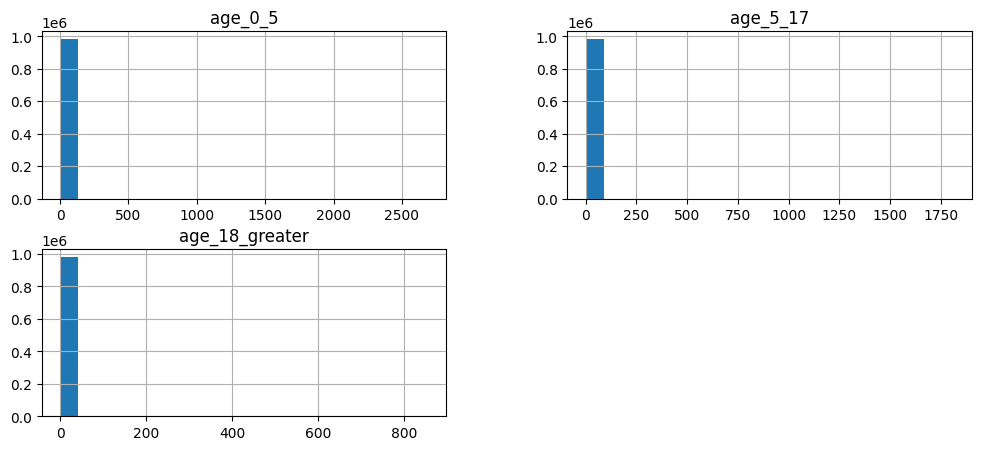

In [30]:
# Summary statistics for each age group
print(df[['age_0_5', 'age_5_17', 'age_18_greater']].describe())

# Histograms
import matplotlib.pyplot as plt
df[['age_0_5', 'age_5_17', 'age_18_greater']].hist(bins=20, figsize=(12,5))
plt.show()

## Create New Column Total enrolment using Age Groups

In [31]:
# Create Total Enrolment column
df['Total_Enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [32]:
df['Total_Enrolment'].dtype

dtype('int64')

In [33]:
# Create total enrolment and demographic ratios (working-age and child dependency) from age-wise enrolment counts

import pandas as pd

# Ensure numeric columns
age_cols = ["age_0_5", "age_5_17", "age_18_greater"]
df[age_cols] = df[age_cols].apply(pd.to_numeric, errors="coerce")

## Ratios (strong signals)
df["working_age_ratio"] = df["age_18_greater"] / df["Total_Enrolment"]
df["child_ratio"] = (df["age_0_5"] + df["age_5_17"]) / df["Total_Enrolment"]

# Optional: round for readability
df[["working_age_ratio", "child_ratio"]] = df[["working_age_ratio", "child_ratio"]].round(2)

# View result
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,iqr_outlier_flag,state_clean,district_clean,Total_Enrolment,working_age_ratio,child_ratio
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,True,Meghalaya,East Khasi Hills,109,0.34,0.66
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,True,Karnataka,Bengaluru Urban,86,0.45,0.55
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,True,Uttar Pradesh,Kanpur Nagar,123,0.10,0.90
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,True,Uttar Pradesh,Aligarh,106,0.14,0.86
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,True,Karnataka,Bengaluru Urban,51,0.41,0.59


In [34]:
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
pincode_age = df.groupby('pincode')[age_cols].sum()
print(pincode_age.head())

         age_0_5  age_5_17  age_18_greater
pincode                                   
110001        88        34               6
110002       274        74               2
110003       540       232              81
110004        10         1               0
110005       618       202              50


In [35]:
print(df.columns)

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater', 'iqr_outlier_flag', 'state_clean', 'district_clean',
       'Total_Enrolment', 'working_age_ratio', 'child_ratio'],
      dtype='object')


In [36]:
df = df.drop(columns=['month_abbr', 'iqr_outlier_flag', 'area_type' ], errors='ignore')

## Top 10 States By Total Enrolment

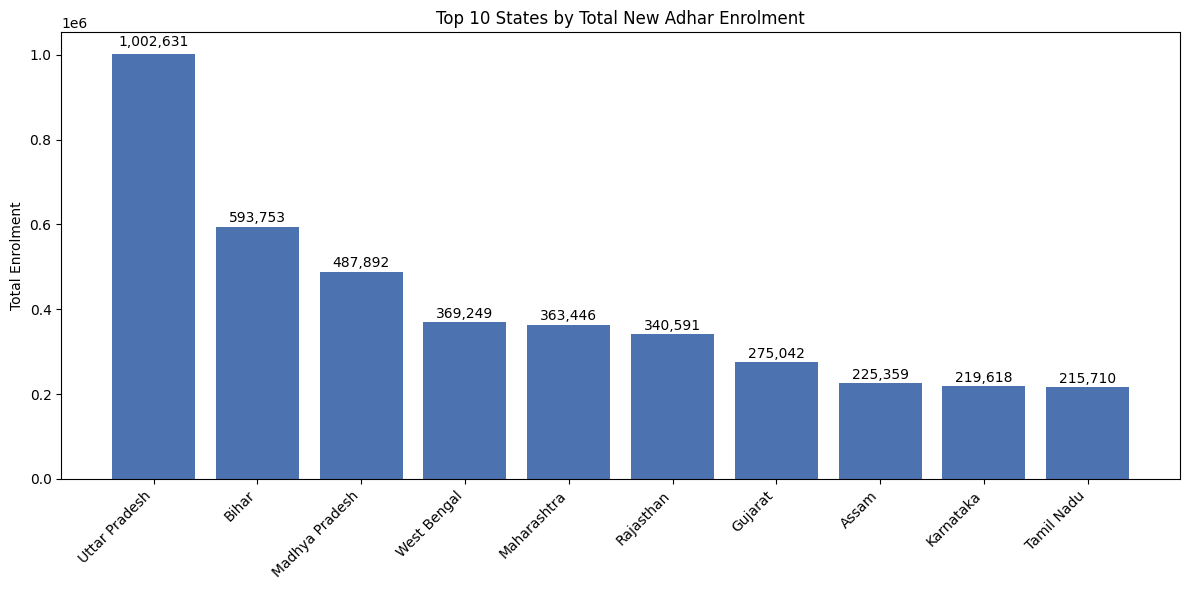

In [37]:
# Top 10 States by Total Enrolment
top_states = df.groupby('state_clean')['Total_Enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_states.index, top_states.values, color='#4C72B0')
plt.title('Top 10 States by Total New Adhar Enrolment')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Top 10 Districts By Total Enrolment

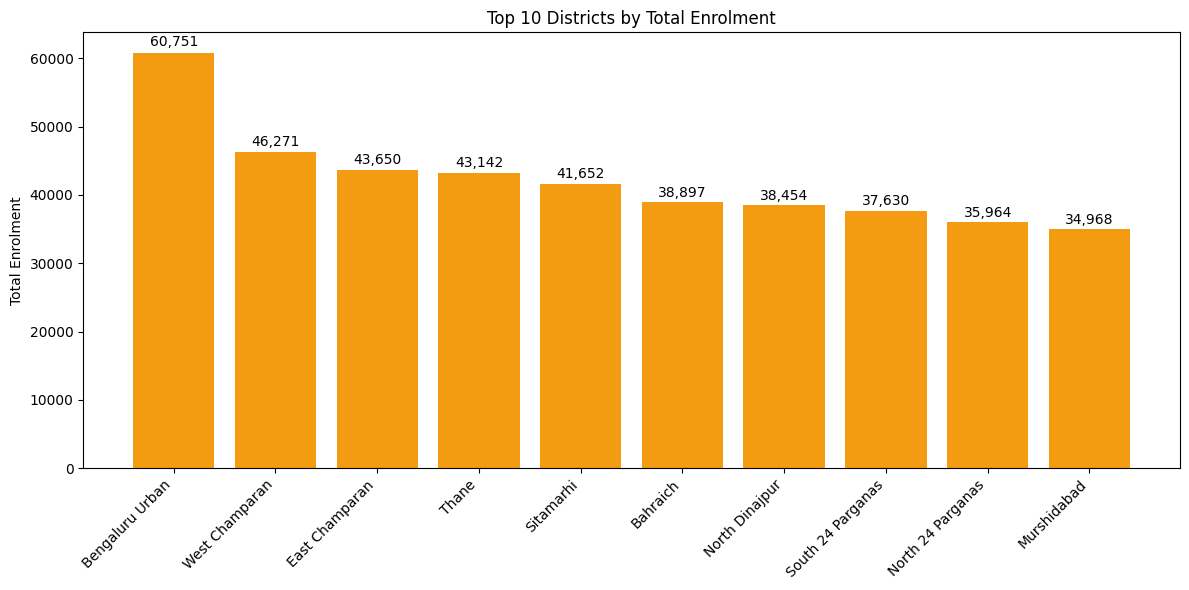

In [38]:
# Create Total Enrolment column
df['Total_Enrolment'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

# Top 10 Districts by Total Enrolment
top_districts = df.groupby('district_clean')['Total_Enrolment'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(top_districts.index, top_districts.values, color='#F39C12')
plt.title('Top 10 Districts by Total Enrolment')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Top 10 Staes Total Enrolment by Pincode

C:\Users\nares\AppData\Local\Temp\ipykernel_12648\3813960743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_pincodes.index.astype(str), y=top_pincodes.values, palette='viridis')


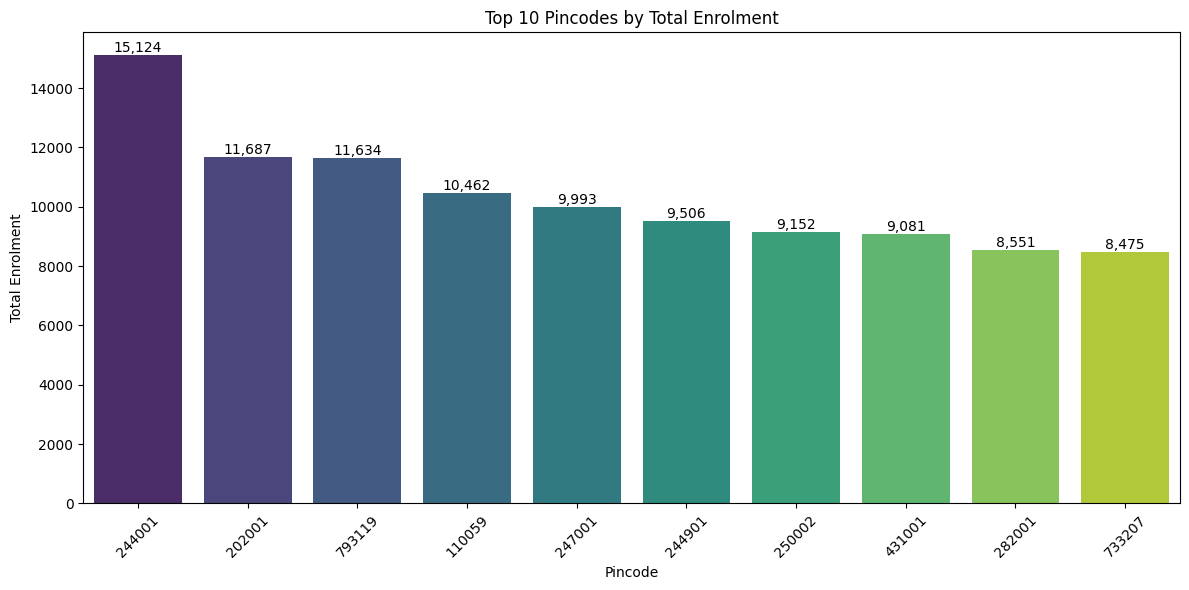

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate Total Enrolment by Pincode
top_pincodes = df.groupby('pincode')['Total_Enrolment'].sum().sort_values(ascending=False).head(10)

# Step 2: Plot
plt.figure(figsize=(12,6))
bars = sns.barplot(x=top_pincodes.index.astype(str), y=top_pincodes.values, palette='viridis')
plt.title('Top 10 Pincodes by Total Enrolment')
plt.xlabel('Pincode')
plt.ylabel('Total Enrolment')

# Step 3: Add data labels on top of bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{int(yval):,}', 
                  (bar.get_x() + bar.get_width()/2, yval),
                  ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


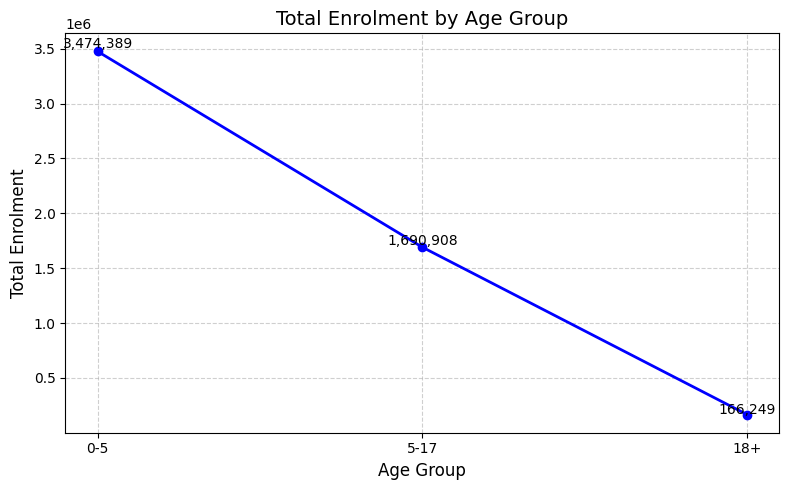

In [40]:
import matplotlib.pyplot as plt

# Aggregate total enrolment by age groups
age_totals = {
    '0-5': df['age_0_5'].sum(),
    '5-17': df['age_5_17'].sum(),
    '18+': df['age_18_greater'].sum()
}

# Prepare data for line chart
age_categories = list(age_totals.keys())
enrolment_values = list(age_totals.values())

# Plot
plt.figure(figsize=(8,5))
plt.plot(age_categories, enrolment_values, marker='o', linestyle='-', color='blue', linewidth=2)

# Labels and title
plt.title('Total Enrolment by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Enrolment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add data labels on points
for i, val in enumerate(enrolment_values):
    plt.text(i, val + 0.01*val, f'{int(val):,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## Outlier Detection

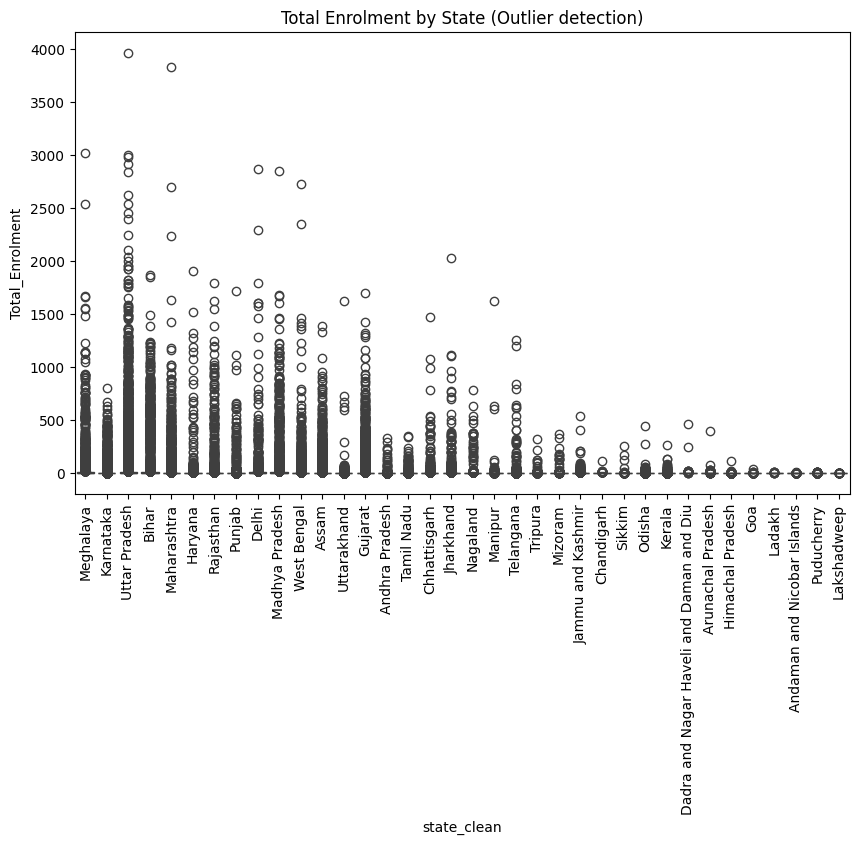

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='state_clean', y='Total_Enrolment', data=df)
plt.xticks(rotation=90)
plt.title('Total Enrolment by State (Outlier detection)')
plt.show()

## BIVARIATE ANALYSIS

C:\Users\nares\AppData\Local\Temp\ipykernel_12648\873061508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state_clean', y='Total_Enrolment', data=df, palette="Set3")


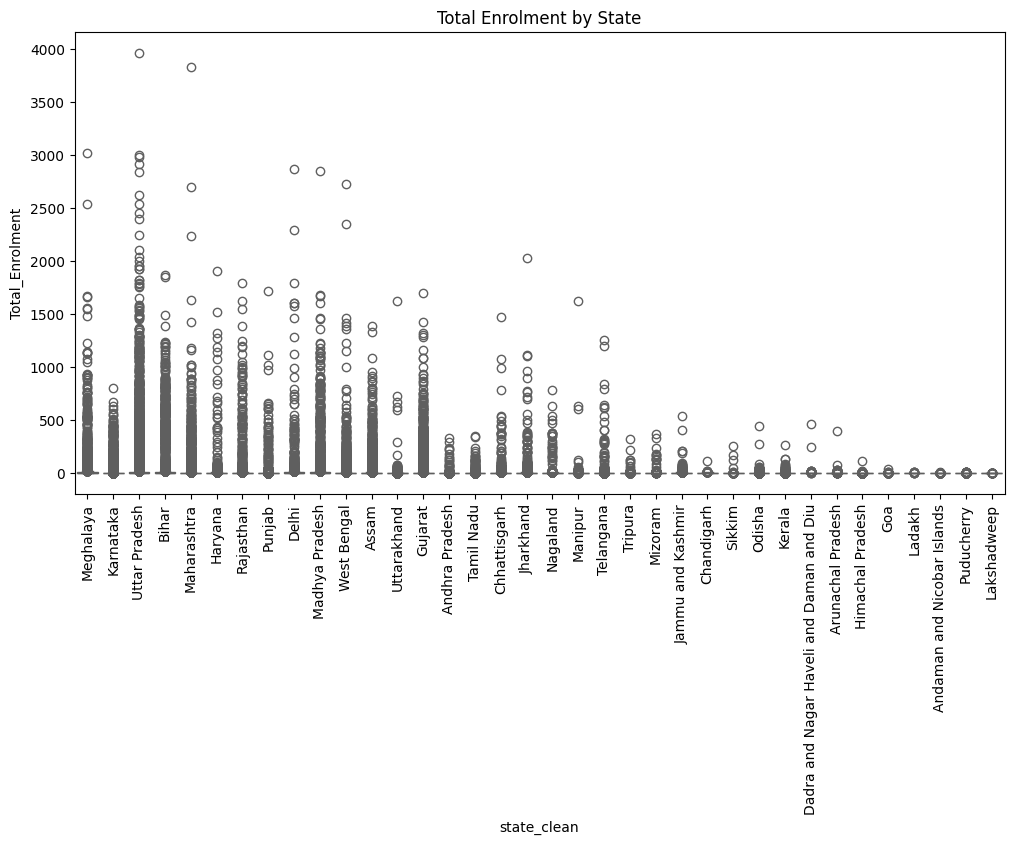

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='state_clean', y='Total_Enrolment', data=df, palette="Set3")
plt.xticks(rotation=90)
plt.title('Total Enrolment by State')
plt.show()

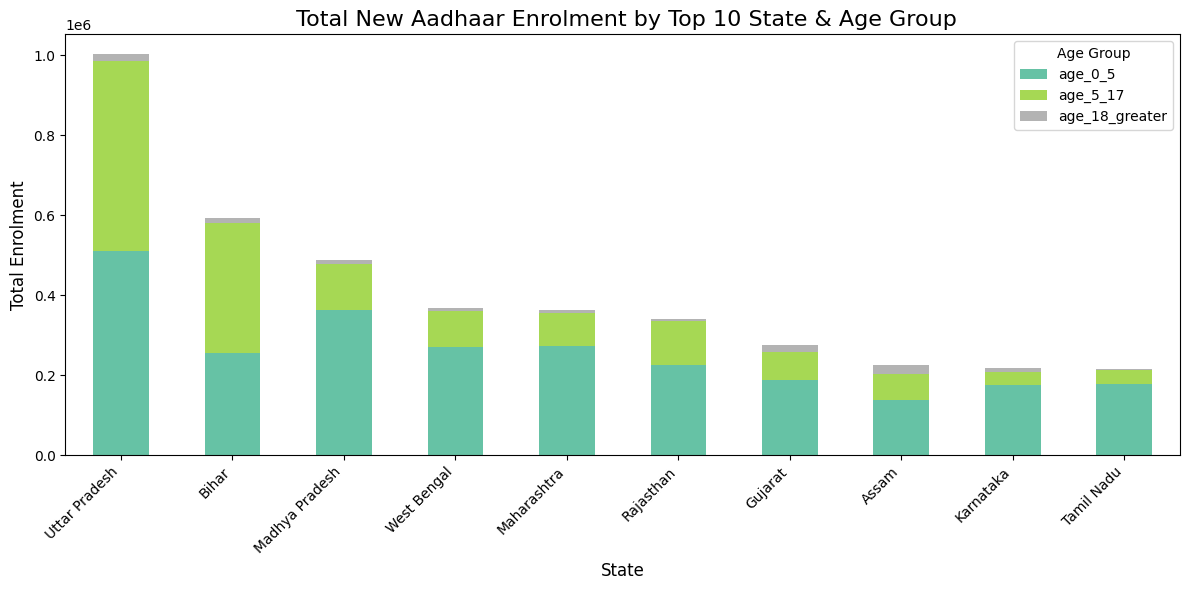

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age group columns
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# Aggregate enrolment by state
df_age = df.groupby('state_clean')[age_cols].sum()

# Get top 10 states by total enrolment
df_age['total'] = df_age.sum(axis=1)
top10_states = df_age.sort_values('total', ascending=False).head(10)
top10_states = top10_states.drop(columns='total')

# Plot stacked bar chart
top10_states.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title(' Total New Aadhaar Enrolment by Top 10 State & Age Group', fontsize=16)
plt.ylabel('Total Enrolment', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [44]:
# Aggregate enrolment by district
df_age_district = df.groupby('district_clean')[age_cols].sum()

# Get top 10 districts by total enrolment
df_age_district['total'] = df_age_district.sum(axis=1)
top10_districts = df_age_district.sort_values('total', ascending=False).head(10)
top10_districts = top10_districts.drop(columns='total')

# Plot stacked bar chart
top10_districts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')

plt.title('Top 10 Districts: Enrolment by Age Group, fontsize=16)
plt.ylabel('Total Enrolment', fontsize=12)
plt.xlabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

SyntaxError: unterminated string literal (detected at line 12) (1511293782.py, line 12)

# TRIVARIATE ANALYSIS

# i) Total New Aadhaar Enrolment by Age Group and State

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ AGE GROUPS ------------------
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# ------------------ AGGREGATE ------------------
df_state_age = df.groupby('state_clean')[age_cols].sum().reset_index()

df_state_age['total_enrol'] = df_state_age[age_cols].sum(axis=1)
df_state_age = df_state_age.sort_values('total_enrol', ascending=False)

# ------------------ TOP & BOTTOM ------------------
# Top 20 → Thousands (K)
top_20 = df_state_age.head(20).copy()
top_20[age_cols] = top_20[age_cols] / 1_000

# Bottom 16 → Thousands (K)
bottom_16 = df_state_age.tail(16).copy()
bottom_16[age_cols] = bottom_16[age_cols] / 1_000

# ------------------ PLOTTING FUNCTION ------------------
def plot_state_new_aadhaar(df_plot, title):
    plt.figure(figsize=(14,7))

    # Colors
    color_0_5  ='#FE3B00'  # orange
    color_5_17 ='#0E169E'   # blue
    color_18p  ='#FF0080'  # green

    plt.bar(df_plot['state_clean'], df_plot['age_0_5'],
            label='Age 0–5', color=color_0_5)

    plt.bar(df_plot['state_clean'], df_plot['age_5_17'],
            bottom=df_plot['age_0_5'],
            label='Age 5–17', color=color_5_17)

    plt.bar(df_plot['state_clean'], df_plot['age_18_greater'],
            bottom=df_plot['age_0_5'] + df_plot['age_5_17'],
            label='Age 18+', color=color_18p)

    plt.title(title, fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('New Aadhaar Enrolment (Thousands)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group')

    # ------------------ DATA LABELS (K) ------------------
    for i, row in enumerate(df_plot.itertuples()):
        plt.text(i, row.age_0_5 / 2, f"{row.age_0_5:.1f}K",
                 ha='center', va='center', color='white', fontsize=9)

        plt.text(i, row.age_0_5 + row.age_5_17 / 2, f"{row.age_5_17:.1f}K",
                 ha='center', va='center', color='white', fontsize=9)

        plt.text(
            i,
            row.age_0_5 + row.age_5_17 + row.age_18_greater / 2,
            f"{row.age_18_greater:.1f}K",
            ha='center', va='center', color='white', fontsize=9
        )

    plt.tight_layout()
    plt.show()

# ------------------ PLOTS ------------------
plot_state_new_aadhaar(
    top_20,
    'Top 20 States: New Aadhaar Enrolment by Age Group (in Thousands)'
)

plot_state_new_aadhaar(
    bottom_16,
    'Bottom 16 States: New Aadhaar Enrolment by Age Group (in Thousands)'
)


## ii) Top & Bottom 30 District: Total New Aadhaar Enrolment by Age Group

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Aggregate NEW Aadhaar enrolment by district ----
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

df_district_age = df.groupby('district_clean')[age_cols].sum().reset_index()

# Total enrolment per district
df_district_age['total_enrol'] = df_district_age[age_cols].sum(axis=1)

# Sort descending
df_district_age = df_district_age.sort_values('total_enrol', ascending=False)

# ---- Top 30 districts (Thousands) ----
top_30 = df_district_age.head(30).copy()
top_30[age_cols] = top_30[age_cols] / 1_000

# ---- Bottom 30 districts (Actual numbers) ----
bottom_30 = df_district_age.tail(30).copy()

# ---- Plot function ----
def plot_stacked_bar(df_plot, title, thousands=True):
    plt.figure(figsize=(16,6))

    plt.bar(df_plot['district_clean'], df_plot['age_0_5'],
            label='Age 0–5', color='#6B007B')

    plt.bar(df_plot['district_clean'], df_plot['age_5_17'],
            bottom=df_plot['age_0_5'],
            label='Age 5–17', color='#12239E')

    plt.bar(df_plot['district_clean'], df_plot['age_18_greater'],
            bottom=df_plot['age_0_5'] + df_plot['age_5_17'],
            label='Age 18+', color='#16A34A')

    plt.title(title)
    plt.xlabel('District')
    ylabel = 'New Aadhaar Enrolment (Thousands)' if thousands else 'New Aadhaar Enrolment'
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group')

    # ---- Data labels ----
    for i, row in enumerate(df_plot.itertuples()):
        fmt = "{:.1f}K" if thousands else "{:,}"

        plt.text(i, row.age_0_5 / 2,
                 fmt.format(row.age_0_5),
                 ha='center', va='center', color='white', fontsize=8)

        plt.text(i, row.age_0_5 + row.age_5_17 / 2,
                 fmt.format(row.age_5_17),
                 ha='center', va='center', color='white', fontsize=8)

        plt.text(i,
                 row.age_0_5 + row.age_5_17 + row.age_18_greater / 2,
                 fmt.format(row.age_18_greater),
                 ha='center', va='center', color='white', fontsize=8)

    plt.tight_layout()
    plt.show()

# ---- PLOTS ----
plot_stacked_bar(
    top_30,
    'Top 30 Districts: New Aadhaar Enrolment by Age Group (Thousands)',
    thousands=True
)

plot_stacked_bar(
    bottom_30,
    'Bottom 30 Districts: New Aadhaar Enrolment by Age Group',
    thousands=False
)


## iii) Top & Bottom 30 Pincodes Total New Aadhaar Enrolment by Age Group

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ CLEAN COLUMN NAMES ------------------
df.columns = df.columns.str.strip().str.lower()

# ------------------ DATA PREP ------------------
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

df_pincode_total = df.groupby('pincode')[age_cols].sum().reset_index()
df_pincode_total['total_enrol'] = df_pincode_total[age_cols].sum(axis=1)
df_pincode_total['pincode'] = df_pincode_total['pincode'].astype(str)
df_pincode_total = df_pincode_total.sort_values('total_enrol', ascending=False)

top_30 = df_pincode_total.head(30).copy()
bottom_30 = df_pincode_total.tail(30).copy()

# Convert Top 30 to thousands
top_30[age_cols] = top_30[age_cols] / 1_000

# ------------------ TOP 30: AGE GROUP STACKED ------------------
plt.figure(figsize=(22,6))

plt.bar(top_30['pincode'], top_30['age_0_5'],
        label='Age 0–5', color='#0E2B4D')

plt.bar(top_30['pincode'], top_30['age_5_17'],
        bottom=top_30['age_0_5'],
        label='Age 5–17', color='#1D6C21')

plt.bar(top_30['pincode'], top_30['age_18_greater'],
        bottom=top_30['age_0_5'] + top_30['age_5_17'],
        label='Age 18+', color='#118DFF')

plt.title('Top 30 PINCODES: Total New Aadhaar Enrolment by Age Group (in Thousands)', fontsize=18)
plt.xlabel('Pincode', fontsize=14)
plt.ylabel('Total Enrolment (Thousands)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')

# Data labels
for i, row in enumerate(top_30.itertuples()):
    plt.text(i, row.age_0_5/2, f"{int(row.age_0_5)}K",
             ha='center', va='center', color='white', fontsize=10)
    plt.text(i, row.age_0_5 + row.age_5_17/2, f"{int(row.age_5_17)}K",
             ha='center', va='center', color='white', fontsize=10)
    plt.text(i, row.age_0_5 + row.age_5_17 + row.age_18_greater/2,
             f"{int(row.age_18_greater)}K",
             ha='center', va='center', color='white', fontsize=10)

plt.tight_layout()
plt.show()

# ------------------ BOTTOM 30: TOTAL ONLY (UNCHANGED) ------------------
def plot_total_enrol(df_plot, title, in_thousands=False):
    if in_thousands:
        df_plot['plot_value'] = df_plot['total_enrol'] / 1000
        ylabel = 'Total Enrolment (Thousands)'
    else:
        df_plot['plot_value'] = df_plot['total_enrol']
        ylabel = 'Total Enrolment (Count)'

    fig, ax = plt.subplots(figsize=(22,6))
    bars = ax.bar(df_plot['pincode'], df_plot['plot_value'], color='#118DFF')

    ax.set_title(title, fontsize=18, pad=15)
    ax.set_xlabel('Pincode', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(range(len(df_plot)))
    ax.set_xticklabels(df_plot['pincode'], rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        label = f"{int(height):,}"
        ax.text(bar.get_x() + bar.get_width()/2,
                height/2, label,
                ha='center', va='center',
                color='white', fontsize=14, fontweight='bold')

    plt.tight_layout(pad=3)
    plt.show()

plot_total_enrol(
    bottom_30,
    'Bottom 30 PINCODES: Total New Aadhaar Enrolment (Absolute Numbers)',
    in_thousands=False
)


In [ ]:
## Extremely low enrolment pincodes represent non-residential or special-use administrative zones
## rather than data errors, and are therefore analytically meaningful outliers

#-----------------------------
# Define age columns
# -----------------------------
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

# -----------------------------
# Aggregate data at pincode level
# -----------------------------
df_pincode = (
    df.groupby('pincode')[age_cols]
      .sum()
      .reset_index()
)

# Ensure pincode is treated as identifier
df_pincode['pincode'] = df_pincode['pincode'].astype(str)

# -----------------------------
# Total enrolment across age groups
# -----------------------------
df_pincode['total_enrol'] = df_pincode[age_cols].sum(axis=1)

# -----------------------------
# Data-driven low-enrolment threshold (5th percentile)
# -----------------------------
low_threshold = df_pincode['total_enrol'].quantile(0.05)

# -----------------------------
# Summary statistics
# -----------------------------
total_pincodes = df_pincode['pincode'].nunique()
low_total_count = (df_pincode['total_enrol'] < low_threshold).sum()

age_0_5_low = (df_pincode['age_0_5'] < low_threshold).sum()
age_5_17_low = (df_pincode['age_5_17'] < low_threshold).sum()
age_18_plus_low = (df_pincode['age_18_greater'] < low_threshold).sum()

age_0_5_0_1 = df_pincode['age_0_5'].isin([0, 1]).sum()
age_5_17_0_1 = df_pincode['age_5_17'].isin([0, 1]).sum()
age_18_plus_0_1 = df_pincode['age_18_greater'].isin([0, 1]).sum()

# -----------------------------
# Bottom 30 pincodes (critical low)
# -----------------------------
bottom_30 = (
    df_pincode
    .sort_values('total_enrol')
    .head(30)[['pincode'] + age_cols + ['total_enrol']]
)

# -----------------------------
# Output
# -----------------------------
print("SUMMARY INSIGHTS OF TOTAL NEW AADHAAR ENROLMENT")
print("-" * 50)
print(f"Total pincodes analysed            : {total_pincodes}")
print(f"5th percentile threshold           : {low_threshold:.0f}")
print(f"Pincodes below threshold           : {low_total_count}")
print(f"Age 0–5 below threshold            : {age_0_5_low}")
print(f"Age 5–17 below threshold           : {age_5_17_low}")
print(f"Age 18+ below threshold            : {age_18_plus_low}")
print(f"Age 0–5 values = 0 or 1             : {age_0_5_0_1}")
print(f"Age 5–17 values = 0 or 1            : {age_5_17_0_1}")
print(f"Age 18+ values = 0 or 1             : {age_18_plus_0_1}")

print("\n Bottom 30 Pincodes Total New Aadhaar Enrolment ")
print("-" * 50)
print(bottom_30)


## CORRELATION ANALYSIS (ADVANCED ANALYSIS)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns only
numeric_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'Total_Enrolment']

# Compute correlation
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14)
plt.show()


## Time series Analysis

In [45]:
import pandas as pd

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Extract month number and month abbreviation (3 letters)
df['month_num'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')  # 'Jan', 'Feb', ...

# Check
df[['date', 'month_num', 'month_name']].head()

,date,month_num,month_name
0,2025-03-02,3,Mar
1,2025-03-09,3,Mar
2,2025-03-09,3,Mar
3,2025-03-09,3,Mar
4,2025-03-09,3,Mar


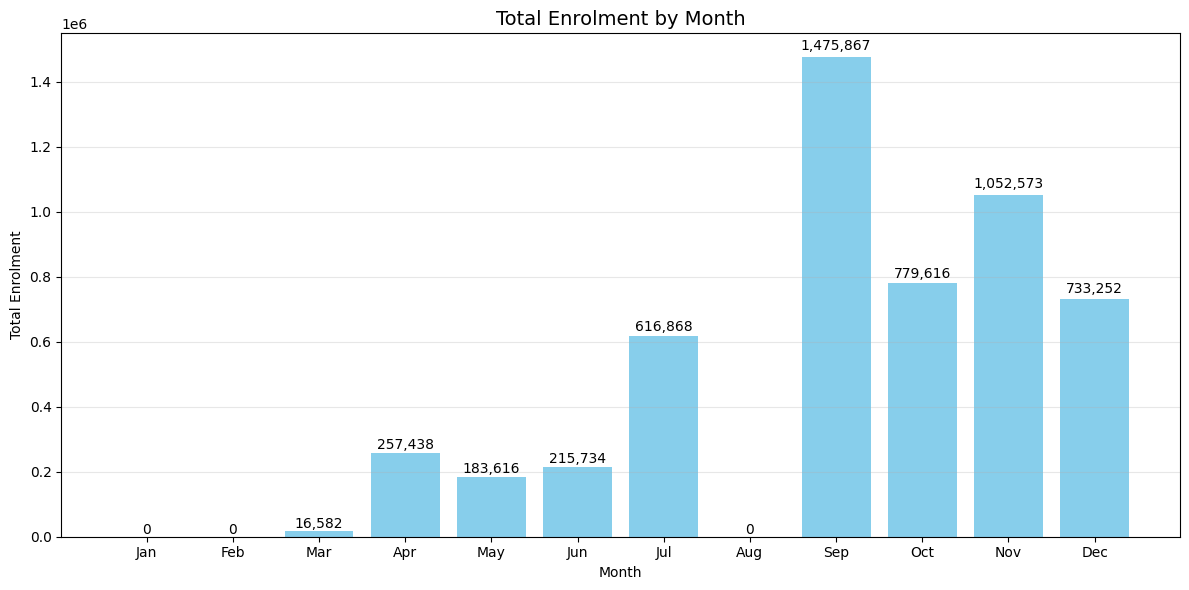

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Convert date and extract month ---
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['month_num'] = df['date'].dt.month
df['month_abbr'] = df['date'].dt.strftime('%b')

import matplotlib.pyplot as plt

# Aggregate total enrolment by month and ensure all months are present
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_total = df.groupby('month_name')['Total_Enrolment'].sum().reindex(months_order, fill_value=0)

# Plot bar chart with data labels
plt.figure(figsize=(12,6))
bars = plt.bar(monthly_total.index, monthly_total.values, color='skyblue')

plt.title('Total Enrolment by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Enrolment')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Top 10 States by Total_Enrolment
# -----------------------------
top_states = df.groupby('state_clean')['Total_Enrolment'].sum() \
               .sort_values(ascending=False) \
               .head(10).index

df_top_states = df[df['state_clean'].isin(top_states)]
monthly_states = (
    df_top_states
    .groupby(['state_clean', 'month_num', 'month_name'])['Total_Enrolment']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

plt.figure(figsize=(12,4))
sns.lineplot(
    data=monthly_states,
    x='month_name',
    y='Total_Enrolment',
    hue='state_clean',
    marker='o',
    palette='tab10'
)
plt.title('Monthly New Aadhaar Enrolment – Top 10 States')
plt.xlabel('')
plt.ylabel('New Aadhaar Enrolment')
plt.xticks(rotation=45)
plt.legend(title='State', ncol=2, fontsize=8, bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


# -----------------------------
# Top 10 Districts by Total_Enrolment
# -----------------------------
top_districts = df.groupby('district_clean')['Total_Enrolment'].sum() \
                  .sort_values(ascending=False) \
                  .head(10).index

df_top_districts = df[df['district_clean'].isin(top_districts)]
monthly_districts = (
    df_top_districts
    .groupby(['district_clean', 'month_num', 'month_name'])['Total_Enrolment']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

plt.figure(figsize=(12,4))
sns.lineplot(
    data=monthly_districts,
    x='month_name',
    y='Total_Enrolment',
    hue='district_clean',
    marker='o',
    palette='tab10'
)
plt.title('Monthly New Aadhaar Enrolment – Top 10 Districts')
plt.xlabel('')
plt.ylabel('New Aadhaar Enrolment')
plt.xticks(rotation=45)
plt.legend(title='District', ncol=2, fontsize=8, bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


# -----------------------------
# Top 10 Pincodes by Total_Enrolment
# -----------------------------
top_pincodes = df.groupby('pincode')['Total_Enrolment'].sum() \
                 .sort_values(ascending=False) \
                 .head(10).index

df_top_pincodes = df[df['pincode'].isin(top_pincodes)]
monthly_pincodes = (
    df_top_pincodes
    .groupby(['pincode', 'month_num', 'month_name'])['Total_Enrolment']
    .sum()
    .reset_index()
    .sort_values('month_num')
)

plt.figure(figsize=(12,4))
sns.lineplot(
    data=monthly_pincodes,
    x='month_name',
    y='Total_Enrolment',
    hue='pincode',
    marker='o',
    palette='tab10'
)
plt.title('Monthly New Aadhaar Enrolment – Top 10 Pincodes')
plt.xlabel('')
plt.ylabel('New Aadhaar Enrolment')
plt.xticks(rotation=45)
plt.legend(title='Pincode', ncol=2, fontsize=8, bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


In [ ]:
df.shape 
df.columns

## KEY INSIGHTS SUMMARY

In [ ]:
print("\n=== AADHAAR ENROLMENT KEY INSIGHTS SUMMARY ===\n")

# ------------------- Overall Metrics -------------------
total_records = len(df)
total_enrolment = df['Total_Enrolment'].sum()
total_children = df['age_0_5'].sum() + df['age_5_17'].sum()
total_adults = df['age_18_greater'].sum()
avg_monthly_enrolment = df.groupby('month_name')['Total_Enrolment'].sum().mean()

print("OVERALL PERFORMANCE:\n")
print(f"Total Records: {total_records}")
print(f"Total Enrolments: {total_enrolment}")
print(f"Total Children (0-17 years): {total_children}")
print(f"Total Adults (18+ years): {total_adults}")
print(f"Average Monthly Enrolment: {avg_monthly_enrolment:.0f}")

# ------------------- Top States -------------------
top_states = df.groupby('state_clean')['Total_Enrolment'].sum().sort_values(ascending=False).head(5)
print("\nTOP 5 STATES BY TOTAL ENROLMENT:\n")
for i, (state, enrol) in enumerate(top_states.items(), 1):
    print(f"{i}. {state}: {enrol}")

# ------------------- Bottom States -------------------
bottom_states = df.groupby('state_clean')['Total_Enrolment'].sum().sort_values(ascending=True).head(5)
print("\nBOTTOM 5 STATES BY TOTAL ENROLMENT:\n")
for i, (state, enrol) in enumerate(bottom_states.items(), 1):
    print(f"{i}. {state}: {enrol}")

# ------------------- Top Districts -------------------
top_districts = df.groupby('district_clean')['Total_Enrolment'].sum().sort_values(ascending=False).head(5)
print("\nTOP 5 DISTRICTS BY TOTAL ENROLMENT:\n")
for i, (district, enrol) in enumerate(top_districts.items(), 1):
    print(f"{i}. {district}: {enrol}")

# ------------------- Age Group Insights -------------------
total_enrol = df['Total_Enrolment'].sum()
child_percent = 100 * total_children / total_enrol
adult_percent = 100 * total_adults / total_enrol

print("\nAGE GROUP DISTRIBUTION:\n")
print(f"Children (0-17 years): {total_children} ({child_percent:.1f}%)")
print(f"Adults (18+ years): {total_adults} ({adult_percent:.1f}%)")

# ------------------- Monthly Trend -------------------
monthly_enrolment = df.groupby('month_name')['Total_Enrolment'].sum()
max_month = monthly_enrolment.idxmax()
min_month = monthly_enrolment.idxmin()
print("\nMONTHLY TREND:\n")
print(f"Month with Highest Enrolment: {max_month} ({monthly_enrolment[max_month]})")
print(f"Month with Lowest Enrolment: {min_month} ({monthly_enrolment[min_month]})")


##  ======= Thank You =======